# Deep Reinforced Learning
노드< 히든 레이어 < 신경망
- TensorFlow, PyTorch -> 자동 미분 함수 lib, back propagation, 일반화 과정
- gradient descent, MSE -> 목적함수 최소화
- 활성화 함수 : RELU, Sigmoid etc..

In [1]:
# Import Lib
import torch
import torch.nn as nn # 신경망 모델 구성 시 필요한 클래스와 함수 제공
import torch.nn.functional as F # 비선형 함수(활성화 함수-RELU, Sigmoid 등 제공)
import torch.optim as optim # 최적화 알고리즘 제공 모듈

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Class - Model
class Model(nn.Module): # nn.Module을 상속받아 신경망 모델 구현
    def __init__(self): #모델의 구조 정의
        super(Model, self).__init__() 
        self.fc1 = nn.Linear(1,128)  # 히든 레이어 1 1차원 입력을 받아
        self.fc2 = nn.Linear(128,128)# 히든 레이어 2 
        self.fc3 = nn.Linear(128,128)# 히든 레이어 3 
        self.fc4 = nn.Linear(128,1,bias=False)# 히든 레이어 4  총 4개의 선형 계층을 거치는 구조
 
    """
    # Forward propogation
        # 신경망에서 입력 데이터를 모델을 통해 전달, 출력값 계산 과정
        # 입력 데이터가 앞쪽에서부터 순차적으로 전파되면서, 계속 누적되고, 최종적으로 출력값이 계산된다.
       
        <Foward Propogation>
        1) Input Data 받기 -> Tensor 형태로 표현됨
        2) Input Data 첫 번째 layer 입력
        3) 각 Layer -> 입력 데이터에 가중치를 곱하고 편향을 더한 결과를 활성화 함수에 적용 
            => 다음 layer에 전달될 값들을 계산
        4) 위 과정을 layer마다 반복
        5) 출력 계층에 도달하면 최종적으로 출려값을 계산
            회귀 문제 -> 활성화함수 적용 X
            분류 문제 -> 활성화 함수 사용해 확률 분포로 변환
        6) Return the Output .
    """        
        
    def forward(self,x): # 입력을 받아 순전파 연산 수행
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # Ouput 값은 활성화 함수 적용 X
        return x

In [3]:
# 데이터 생성 함수 F(x)
def true_fun(X): #입력값 X에 대해 무작위 노이즈 생성, 사인함수+노이즈 반환
    noise = np.random.rand(X.shape[0]) *0.4 - 0.2
    return np.cos(1.5 * np.pi *X) + X +noise

In [4]:
# Plotting 함수 - 시각화
def plot_results(model):
    x = np.linspace(0, 5, 100) # 0에서 5 사이 100구간으로 나눔
    # NumPy 배열 'x'를 tensor로 변환 => Input 값으로 사용
    # unsqueeeze(1) 차원을 추가해 2차원 tensor로 만듦.
    input_x = torch.from_numpy(x).float().unsqueeze(1)
    # 예측 x의 실제 결과 값을 plotting
    plt.plot(x, true_fun(x), label="Truth")
    # model의 예측값을 NumPy 배열로 변환한 뒤 plotting
    plt.plot(x, model(input_x).detach().numpy(), label="Prediction")
    plt.legend(loc='lower right',fontsize=15)
    plt.xlim((0, 5))
    plt.ylim((-1, 5))
    plt.grid()

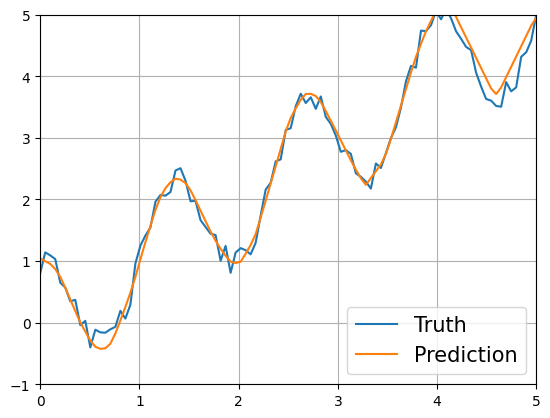

In [5]:
def main():
    #  입력 데이터 생성
    data_x = np.random.rand(10000) * 5 # 0~5 사이 숫자 1만개를 샘플링하여 인풋으로 사용 
    
    # Model과 Optimizer 초기화
    model = Model()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Model 학습 
    for step in range(10000):
        # data_x에서 랜덤하게 32개의 데이터를 선택하여 mini-batch를 구성
        batch_x = np.random.choice(data_x, 32) 
        # 선택된 데이터를 tensor로 변환
        batch_x_tensor = torch.from_numpy(batch_x).float().unsqueeze(1) #tensor로 변환
        # model을 사용해 예측값 계산 
        pred = model(batch_x_tensor)
        
        # mini-batch의 실제값 계산
        batch_y = true_fun(batch_x)
        # NumPy 배열을 PyTorch 텐서로 변환한다. 
            # => 손실 함수 계산에 활용 
        truth = torch.from_numpy(batch_y).float().unsqueeze(1)
        # 모델의 예측값과 실제값 사이 MSE(= 손실함수) 계산
        loss = F.mse_loss(pred, truth) # 손실 함수인 MSE를 계산하는 부분
        
        # optimizer: gradient를 활용해 모델의 파라미터를 조정하고 손실을 최소화하는 방향으로 학습을 진행하게끔 한다. 
        # gradient(함수의 기울기): 신경망에서 손실함수의 기울기를 뜻하며. 
        # parameter를 업데이트하기 위한 방향과 크기를 제공한다.
        optimizer.zero_grad() # optimizer의 gradient를 0으로 초기화
        # => 새로운 mini-batch에 대한 gradient 계산을 위해 이전 mini-batch의 gradient를 제거하는 역할.
        
        # 역전파를 통한 그라디언트 계산
        # 역전파는 손실 함수를 모델의 파라미터로 편미분하여, 각 파라미터에 대한 gradient 계산
        loss.mean().backward() 
        optimizer.step() # Update the Parameters
    
    # Plotting
    plot_results(model)

if __name__ == '__main__':
    main()